# Team DatenWelle

## Exploratory data analysis

This notebook loads the data from JSON format and performs some initial clean-up and visualisation tasks

In [1]:
#!git pull
#!git status
#!git add 1-anya_exploratory_analysis.ipynb
#!git push

In [2]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Opening JSON file
f = open('../data/raw/CMS_2010_to_June_2022_ENGLISH.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

df = pd.DataFrame.from_dict(data)

print(df.head())

         id                                               name  \
0  16489913                 UN imposes sanctions on DRC rebels   
1  16489912            Catholic Church abuse hotline goes cold   
2  16489903  "Fiscal cliff" tax hikes go into effect in the US   
3  16490025  Kim seeks reconciliation with South, economic ...   
4  16490029  Senate-approved fiscal deal faces House consid...   

                    shortTitle  \
0      UN sanctions DRC rebels   
1                 Disconnected   
2  US goes over "fiscal cliff"   
3    A rare New Year's address   
4   US House mulls fiscal deal   

                                                text  \
0  <p>\n\tThe UN Security Council has sanctioned ...   
1  <p>\n\tFor two and a half years, the counselin...   
2  <p>\n\tAs the clock struck midnight in Washing...   
3  <p>\n\tKim Jong Un, who came to office just ov...   
4  <p>\n\tLess than two hours after the US had of...   

                                              teaser  \
0  A 

In [4]:
df_copy= df.copy()
#general info on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175659 entries, 0 to 175658
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     175659 non-null  int64 
 1   name                   175659 non-null  object
 2   shortTitle             175659 non-null  object
 3   text                   175659 non-null  object
 4   teaser                 175659 non-null  object
 5   shortTeaser            175659 non-null  object
 6   kicker                 70090 non-null   object
 7   regions                175659 non-null  object
 8   keywords               175659 non-null  object
 9   keywordStrings         175659 non-null  object
 10  thematicFocusCategory  79913 non-null   object
 11  navigations            175659 non-null  object
 12  categories             175659 non-null  object
 13  departments            175659 non-null  object
 14  firstPublicationDate   42070 non-null   object
 15  lastM

In [5]:
df.isnull().sum()


id                            0
name                          0
shortTitle                    0
text                          0
teaser                        0
shortTeaser                   0
kicker                   105569
regions                       0
keywords                      0
keywordStrings                0
thematicFocusCategory     95746
navigations                   0
categories                    0
departments                   0
firstPublicationDate     133589
lastModifiedDate              0
contentDate                   0
relatedAutoTopics             0
contentLinks                  0
articles                      0
isOpinion                     0
geographicLocations       25294
contentAssociations           0
mainContentImageLink       5295
images                        0
externalLinks                 0
topStory                      0
language                 150365
dtype: int64

In [6]:
#sns.countplot(y=df.isnull().sum(),data=df)

In [7]:
df['regions']

0                                                        []
1                                                        []
2                                                        []
3                                                        []
4                                                        []
                                ...                        
175654    [{'name': 'Turkey'}, {'name': 'Sweden'}, {'nam...
175655                                 [{'name': 'Turkey'}]
175656                     [{'name': 'Russian Federation'}]
175657                                 [{'name': 'France'}]
175658                                [{'name': 'Ecuador'}]
Name: regions, Length: 175659, dtype: object

In [8]:
cd=df['contentDate'].tail()

In [9]:
fp=df['firstPublicationDate'].tail()
fp

175654    2022-06-30T19:00:09.518Z
175655    2022-06-30T19:23:57.846Z
175656    2022-06-30T19:53:57.730Z
175657    2022-06-30T19:54:24.110Z
175658    2022-06-30T19:56:58.370Z
Name: firstPublicationDate, dtype: object

([0, 1, 2, 3, 4],
 [Text(0, 0, '2022-06-30T19:00:09.518Z'),
  Text(0, 1, '2022-06-30T19:23:57.846Z'),
  Text(0, 2, '2022-06-30T19:53:57.730Z'),
  Text(0, 3, '2022-06-30T19:54:24.110Z'),
  Text(0, 4, '2022-06-30T19:56:58.370Z')])

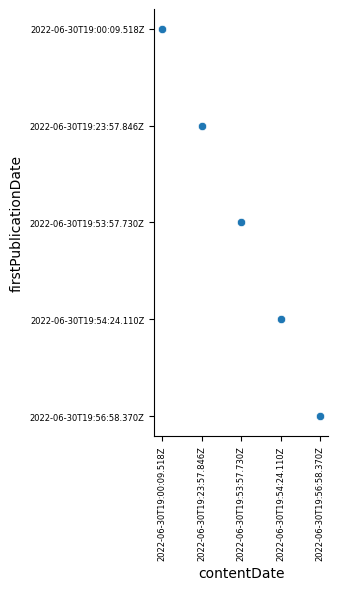

In [10]:
sns.relplot(data=df, x=cd,y=fp)
plt.xticks(fontsize=6, rotation=90)
plt.yticks(fontsize=6)

## exploring regions (c)Magda

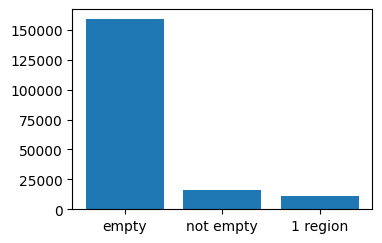

In [11]:
# Keep rrows where regions is not empty
df_regions_notempty = df[df['regions'].apply(lambda x: len(x)) > 0]

# Keep rows where there is only one region
df_regions_n1 = df[df['regions'].apply(lambda x: len(x)) == 1]

# Plot numbers 
fig = plt.figure(figsize=(3,2))
ax = fig.add_axes([0,0,1,1])
x = ['empty', 'not empty', '1 region']
y = [len(df)-len(df_regions_notempty),len(df_regions_notempty), len(df_regions_n1)]
ax.bar(x,y)
plt.show()

## Exploring Focus Categories column

In [12]:

#df['thematicFocusCategory'].astype(str).unique()
#Exporting dictionary into the array of 'clean' focus categories
focus_clean = df['thematicFocusCategory'].apply(lambda x: x['name'] if x is not None else x)
focus_clean.unique()

array([None, 'History', 'Business', 'Conflicts', 'Politics', 'Culture',
       'Society', 'Education', 'Digital World', 'Sports', 'Crime',
       'Lifestyle', 'Religion', 'Human Rights', 'Science', 'Music',
       'Law and Justice', 'Terrorism', 'Nature and Environment', 'Film',
       'Travel', 'Media', 'Technology', 'Soccer', 'Learning German',
       'Catastrophe', 'Cars and Transportation', 'Health', 'Literature',
       'Arts', 'Architecture', 'Dance', 'Design', 'Theater', 'Migration',
       'Freedom of Speech', 'Trade', 'Rule of Law', 'Press Freedom',
       'Offbeat', 'Equality', 'Climate', 'Corruption', 'Diversity',
       'Innovation', 'Globalization', 'Food Security'], dtype=object)

In [13]:
# Amount of articles per FocusCategory
focus_clean.value_counts()

Politics                   24923
Sports                      6546
Business                    6295
Culture                     5699
Society                     4809
Conflicts                   4568
Nature and Environment      4260
Crime                       3548
Health                      2781
Law and Justice             1783
Catastrophe                 1740
Media                       1740
Science                     1499
Travel                      1416
Human Rights                1254
Music                        846
Terrorism                    829
History                      659
Religion                     619
Technology                   515
Film                         414
Soccer                       405
Education                    384
Cars and Transportation      352
Lifestyle                    335
Arts                         321
Literature                   244
Migration                    223
Press Freedom                219
Digital World                119
Rule of La

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, 'History'),
  Text(0, 1, 'Business'),
  Text(0, 2, 'Conflicts'),
  Text(0, 3, 'Politics'),
  Text(0, 4, 'Culture'),
  Text(0, 5, 'Society'),
  Text(0, 6, 'Education'),
  Text(0, 7, 'Digital World'),
  Text(0, 8, 'Sports'),
  Text(0, 9, 'Crime'),
  Text(0, 10, 'Lifestyle'),
  Text(0, 11, 'Religion'),
  Text(0, 12, 'Human Rights'),
  Text(0, 13, 'Science'),
  Text(0, 14, 'Music'),
  Text(0, 15, 'Law and Justice'),
  Text(0, 16, 'Terrorism'),
  Text(0, 17, 'Nature and Environment'),
  Text(0, 18, 'Film'),
  Text(0, 19, 'Travel'),
  Text(0, 20, 'Media'),
  Text(0, 21, 'Technology'),
  Text(0, 22, 'Soccer'),
  Text(0, 23, 'Learning German'),
  Text(0, 24, 'Catastrophe'),
  Text(0, 25, 'Cars and Transportation'),
  Text(0, 26, 'Health'),
  Text(0, 27, 'Literature'),
  Text

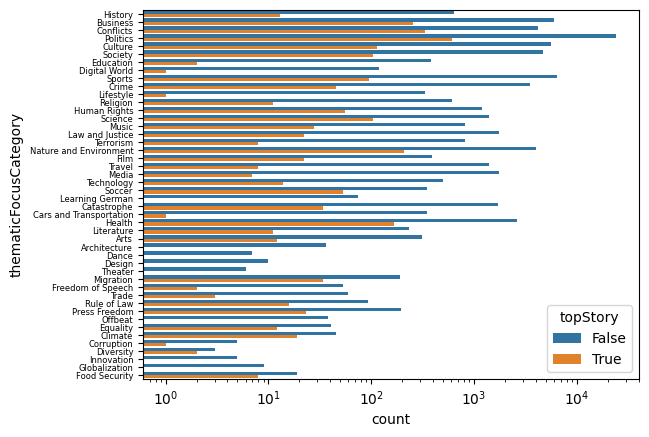

In [14]:
#Plotting amount of TopStories across FocusCategories
sns.countplot(y=focus_clean, hue='topStory', data=df)
plt.xscale('log')
plt.yticks(fontsize=6)#, rotation=90)

### Keywords exploration

In [15]:
df['keywords'] # is keywords in dictionary

0         [{'name': 'DRC'}, {'name': 'M23'}, {'name': 'F...
1         [{'name': 'telephone'}, {'name': 'hotline'}, {...
2         [{'name': 'fiscal cliff'}, {'name': 'Obama'}, ...
3         [{'name': 'Kim Jong Un'}, {'name': 'Kim Jong I...
4         [{'name': 'fiscal cliff'}, {'name': 'US Senate...
                                ...                        
175654    [{'name': 'Turkey'}, {'name': 'Recep Tayipp Er...
175655    [{'name': 'pollution'}, {'name': 'gold mine'},...
175656    [{'name': 'war'}, {'name': 'Ukraine'}, {'name'...
175657    [{'name': 'France'}, {'name': 'vegetarian'}, {...
175658          [{'name': 'Ecuador'}, {'name': 'protests'}]
Name: keywords, Length: 175659, dtype: object

In [16]:
df['keywords'].isna().sum()


0

In [17]:
def get_keywords(row):
    if row is None:
        return None
    else:
        res_list = []
        for name_dict in row:
            res_list.append(name_dict['name'])
        return res_list

lists_kw=df['keywords'].apply(get_keywords)

In [38]:
list_kw=lists_kw.tolist()
list1

NameError: name 'lists_kw' is not defined

In [ ]:
s = [1, 2, 3]
list(set(t) - set(s)

In [30]:
list1.strip()

AttributeError: 'list' object has no attribute 'strip'

In [21]:
i=0
while i < 10: #175658
    fulllist=lists[i].append(lists[i+1])

KeyboardInterrupt: 

In [ ]:
keywords=df['keywordStrings'] # is keywords in strings
keywords

0         [DRC, M23, FDLR, Rwanda, Susan Rice, UN securi...
1         [telephone, hotline, helpline, Catholic Church...
2         [fiscal cliff, Obama, congress, spending cuts,...
3         [Kim Jong Un, Kim Jong Il, Kim Il Sung, lee my...
4         [fiscal cliff, US Senate, Senate vote, fiscal ...
                                ...                        
175654    [Turkey, Recep Tayipp Erdogan, Finland Sweden,...
175655     [pollution, gold mine, Turkey, Anagold, cyanide]
175656    [war, Ukraine, Russia, Russian attack, soldier...
175657                 [France, vegetarian, steak, sausage]
175658                                  [Ecuador, protests]
Name: keywordStrings, Length: 175659, dtype: object

In [ ]:
keywords.isna().sum()

0

In [ ]:
# for i in df['keywordStrings']:
#     print(i)
df['keywordStrings'][10]


['syria',
 'brahimi',
 'bashar assad',
 'rebel forces',
 'syrian civil war',
 'aleppo',
 'damascus']